# Datapreprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(
  {
    'A': [1, 2, 3, 4, np.nan],
    'B': [10, np.nan, 30, 40, 50],
    'C': [np.nan, 200, 300, 400, 500]
  }
)

In [3]:
df

,A,B,C
0,1.0,10.0,NaN
1,2.0,NaN,200.0
2,3.0,30.0,300.0
3,4.0,40.0,400.0
4,NaN,50.0,500.0


In [4]:
df.isnull()

,A,B,C
0,False,False,True
1,False,True,False
2,False,False,False
3,False,False,False
4,True,False,False


In [5]:
df.dropna()

,A,B,C
2,3.0,30.0,300.0
3,4.0,40.0,400.0


## sklearn installation

In [6]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Imputer 

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imp = SimpleImputer(strategy='median')

In [9]:
imp.fit(df)

SimpleImputer(strategy='median')

In [10]:
df[df.columns] = imp.transform(df)
df

,A,B,C
0,1.0,10.0,350.0
1,2.0,35.0,200.0
2,3.0,30.0,300.0
3,4.0,40.0,400.0
4,2.5,50.0,500.0


In [11]:
df = pd.DataFrame([[23, 'male'],
                   [43, 'female'],
                   [31, 'male'],
                   [35, 'female'],
                   [40, 'male']],
                   columns=['age', 'sex'])

In [12]:
df

,age,sex
0,23,male
1,43,female
2,31,male
3,35,female
4,40,male


## Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(df["sex"])

LabelEncoder()

In [15]:
df["sex_encoded"] = le.transform(df["sex"])
df

,age,sex,sex_encoded
0,23,male,1
1,43,female,0
2,31,male,1
3,35,female,0
4,40,male,1


In [16]:
le.classes_

array(['female', 'male'], dtype=object)

## Onehot encoding

In [17]:
df = pd.DataFrame([[23, 'male'],
                   [43, 'female'],
                   [31, 'male'],
                   [35, 'female'],
                   [40, 'male']],
                   columns=['age', 'sex'])
df

,age,sex
0,23,male
1,43,female
2,31,male
3,35,female
4,40,male


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
ohe = ColumnTransformer([("OneHotEncoder", OneHotEncoder(), [1])], remainder = 'passthrough')

In [20]:
df_ohe = df.copy()
ohe.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(), [1])])

In [21]:
ohe.transform(df)

array([[ 0.,  1., 23.],
       [ 1.,  0., 43.],
       [ 0.,  1., 31.],
       [ 1.,  0., 35.],
       [ 0.,  1., 40.]])

In [22]:
ohe.transform(df)

array([[ 0.,  1., 23.],
       [ 1.,  0., 43.],
       [ 0.,  1., 31.],
       [ 1.,  0., 35.],
       [ 0.,  1., 40.]])

## Feature normalization

In [23]:
df = pd.DataFrame({
  'data1': [1, 2, 3, 4, 5],
  'data2': [1000, 3000, 3500, 5000, 7000]
})
df

,data1,data2
0,1,1000
1,2,3000
2,3,3500
3,4,5000
4,5,7000


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-1.41421356, -1.44280393],
       [-0.70710678, -0.44776674],
       [ 0.        , -0.19900744],
       [ 0.70710678,  0.54727045],
       [ 1.41421356,  1.54230764]])

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.33333333],
       [0.5       , 0.41666667],
       [0.75      , 0.66666667],
       [1.        , 1.        ]])

# Classification

In [27]:
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()

In [29]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:
X, y = iris.data, iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [31]:
X.shape

(150, 4)

## Splitting the Dataset

In [32]:
from sklearn.model_selection import train_test_split, KFold

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [34]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [35]:
kf = KFold(n_splits=10, shuffle=True)

In [36]:
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(fold, test_idx)

0 [ 14  18  19  26  32  62  66  92  94  95  98 118 126 129 141]
1 [  6   9  17  20  22  29  49  51  58  74  88  97 103 125 130]
2 [  4   7  33  46  52  54  59  63  82  83 104 122 135 136 144]
3 [ 11  27  28  35  69  70  78  81  90 114 119 131 132 142 147]
4 [  0  13  16  36  41  45  65  84  87  93 101 127 138 143 145]
5 [  1   3  21  23  53  56  72  79  80 102 117 128 134 139 148]
6 [ 24  30  31  48  60  61  64  67  68  89 111 113 116 120 140]
7 [  2   5  15  25  37  40  42  47  55  57  77 106 109 121 149]
8 [  8  10  34  38  43  73  85  96 105 108 110 123 133 137 146]
9 [ 12  39  44  50  71  75  76  86  91  99 100 107 112 115 124]


# SVM

In [37]:
np.random.seed(123)
df1 = pd.DataFrame({"x": np.random.uniform(size=50), "y": np.random.uniform(size=50), "target": np.repeat(0, 50)})
df2 = pd.DataFrame({"x": np.random.uniform(-1, 0, size=50), "y": np.random.uniform(-1, 0, size=50), "target": np.repeat(1, 50)})
df = pd.concat([df1, df2], ignore_index=True)
df

,x,y,target
0,0.696469,0.120629,0
1,0.286139,0.826341,0
2,0.226851,0.603060,0
3,0.551315,0.545068,0
4,0.719469,0.342764,0
...,...,...,...
95,-0.246474,-0.364100,1
96,-0.258138,-0.967802,1
97,-0.951421,-0.255219,1
98,-0.291303,-0.527087,1


In [38]:
data0 = df.query('target == 0').loc[:, ["x", "y"]].values
target0 = df.query('target == 0').loc[:, "target"].values
data1 = df.query('target == 1').loc[:, ["x", "y"]].values
target1 = df.query('target == 1').loc[:, "target"].values

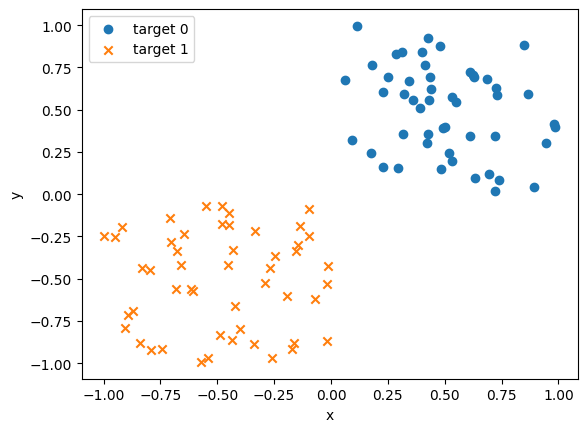

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [40]:
from sklearn.svm import SVC

In [41]:
def plot_boundary_margin_sv(data0, target0, 
                            data1, target1, 
                            kernel, 
                            C, 
                            xmin=-1, xmax=1, 
                            ymin=-1, ymax=1):
    
    svc = SVC(kernel=kernel, C=C)  # <-- 1
    svc.fit(np.vstack((data0, data1)), np.hstack((target0, target1)))  # <-- Model training 
    
    # 3
    fig, ax = plt.subplots()
    ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
    ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
    # 4
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', ':'])
    ax.scatter(svc.support_vectors_[:, 0],
               svc.support_vectors_[:, 1],
               s=250,
               facecolors='none',
               edgecolors='red') # <-- 5

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

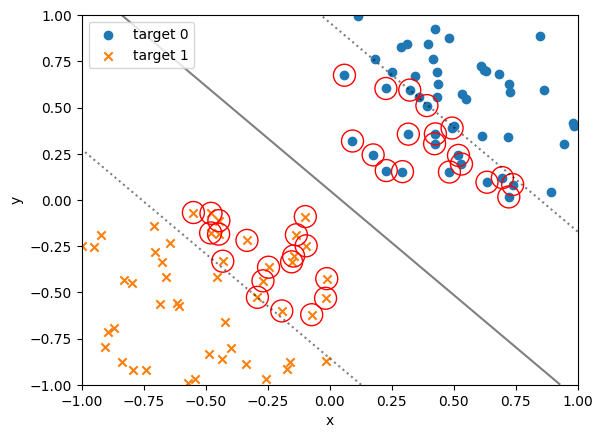

In [42]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=0.1)

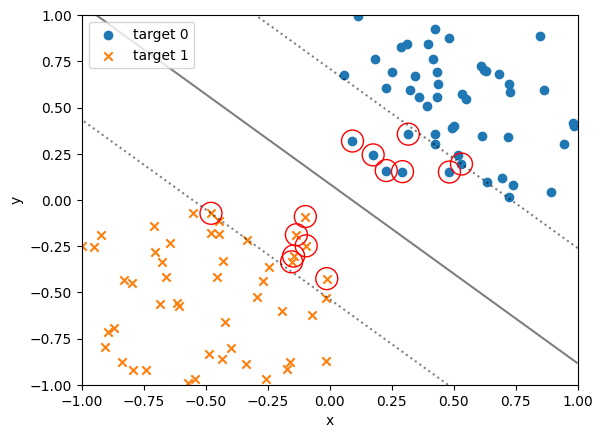

In [43]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=0.5)

# Prediction

In [44]:
np.random.seed(123)
data = np.random.uniform(size=(50, 2))
target = (data[:, 1] > 2*(data[:, 0]-0.5)**2 + 0.5).astype(int)

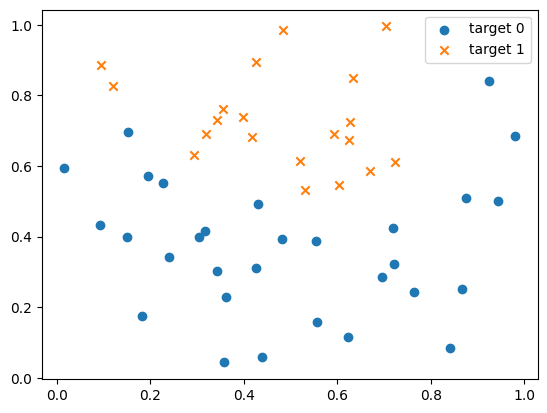

In [45]:
fig, ax = plt.subplots()
ax.scatter(data[target == 0, 0], data[target == 0, 1], marker="o", label='target 0') # <-- 1
ax.scatter(data[target == 1, 0], data[target == 1, 1], marker="x", label='target 1') # <-- 2
ax.legend()
plt.show()

In [46]:
data0, data1 = data[target == 0, :], data[target == 1, :]
target0, target1 = target[target == 0], target[target == 1]

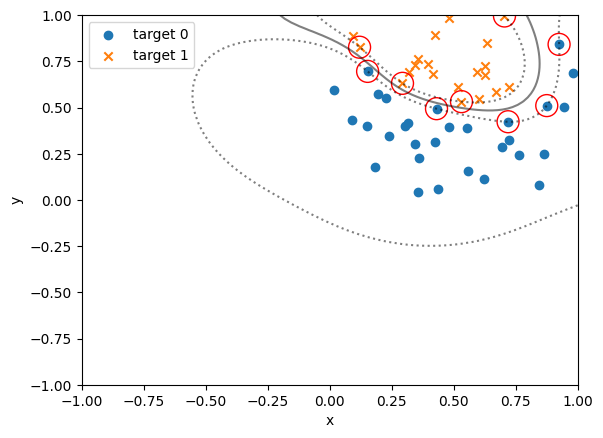

In [47]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='rbf', C=1e6)

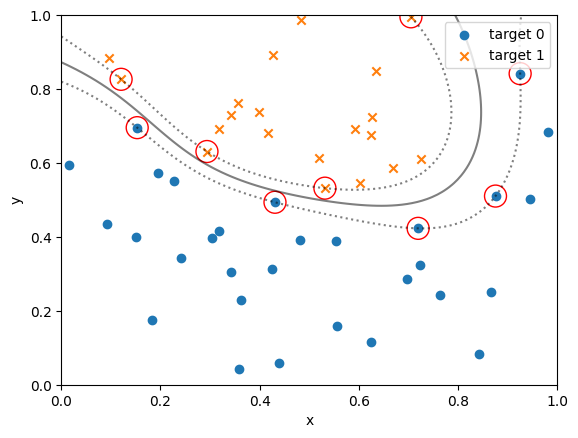

In [48]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='rbf', C=1e6, 
                        xmin=0, xmax=1, ymin=0, ymax=1)

# Decision Tree

In [49]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [51]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(data_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

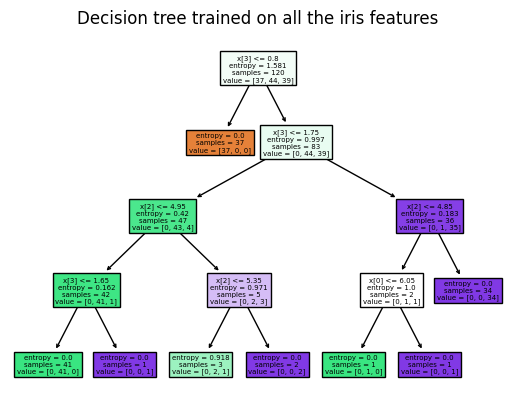

In [52]:
plt.figure() 
plot_tree(model, filled=True) 
plt.title("Decision tree trained on all the iris features") 
plt.show()

In [53]:
target_pred = model.predict(data_test)
target_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

In [54]:
target_test

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(target_pred, target_test)

0.9333333333333333

# RandomForest model

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [63]:
forest = RandomForestClassifier(n_estimators=500, random_state=123)

In [64]:
forest.fit(data_train, target_train)

RandomForestClassifier(n_estimators=500, random_state=123)

In [65]:
y_pred = forest.predict(data_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

In [66]:
accuracy_score(y_pred, target_test)

0.9333333333333333

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [73]:
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [74]:
lr = LinearRegression()
lr.fit(data_train, target_train)

LinearRegression()

In [75]:
target_pred = lr.predict(data_test)
target_pred

array([16.00330023, 27.79447431, 39.26769478, 18.32613556, 30.45487494,
       37.67724152, 25.28488162, 10.22712629, 14.82537224, 31.99311717,
       28.98969206, 19.17253244, 13.77310754, 31.69400164, 16.51057791,
       21.43127305, 20.36911404, 37.50141667, 18.10978575, 15.81266015,
       13.80299258, 24.48033748, 32.93389583, 39.42064642, 31.48120599,
       22.36455033, 17.60924332, 20.94828713, 23.4130816 , 20.38151773,
       25.79402412, 34.04473076, 15.11357401, 21.91097373, 24.05551144,
       34.58404676, 29.34099148, 18.2535874 , 13.95709552, 38.23179838,
       31.0049878 , 18.74606681, 19.72857941, 40.31936227,  8.19674997,
       27.30047872, 19.28830095, 25.58425976, 15.4961129 , 25.86694355,
       34.87324014, 24.25453569, 19.61772711, 12.47561892, 24.42804102,
       17.9505124 ,  9.69615055,  2.3378285 , 31.80311538, 13.65050017,
       20.05798605, 22.5516387 , 20.0245067 , 17.85753966, 25.0631636 ,
       27.19590817, 25.97988145, 22.09920138, 24.66187205, 30.39

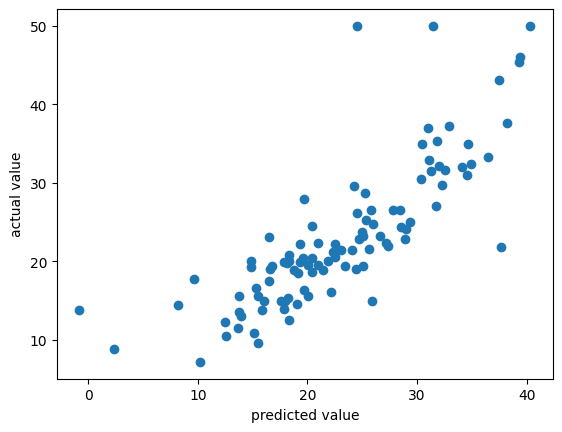

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(target_pred, target_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

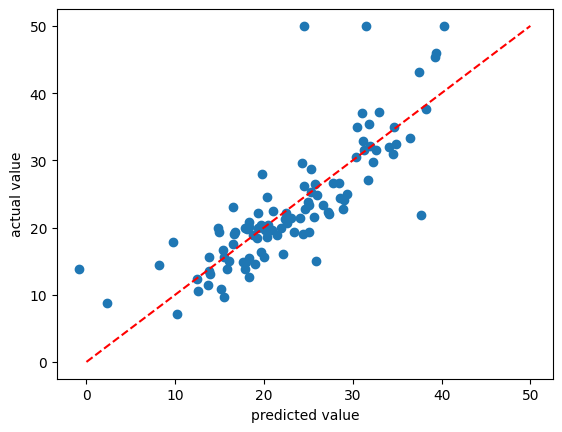

In [78]:
fig, ax = plt.subplots()
ax.scatter(target_pred, target_test)
ax.plot((0, 50), (0, 50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

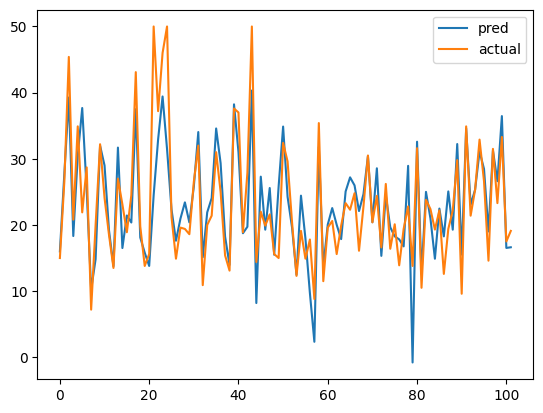

In [79]:
plt.plot(target_pred, label='pred')
plt.plot(target_test, label='actual')
plt.legend()
plt.show()

# PCA

In [80]:
np.random.seed(123)
data1 = np.random.random(50)
data2 = 2*data1 + 0.3*np.random.random(50)

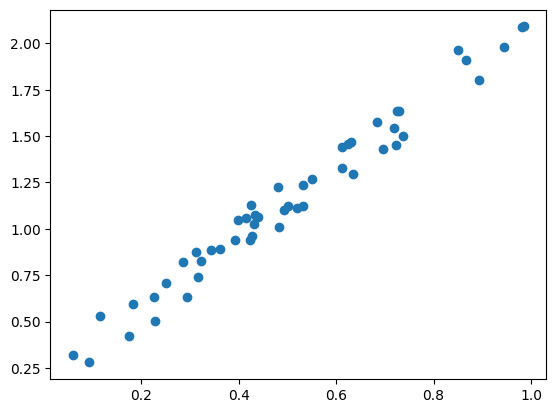

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data1, data2)
plt.show()

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(n_components=2)

In [84]:
data_pca = pca.fit_transform(np.hstack((data1[:, np.newaxis], data2[:, np.newaxis])))

In [85]:
data_pca

array([[ 3.33545268e-01,  4.80346700e-02],
       [-3.95439719e-01, -4.00946670e-02],
       [-5.87646777e-01, -8.40870569e-03],
       [ 1.22355594e-01, -7.01293201e-03],
       [ 4.44306979e-01,  1.72348326e-02],
       [-2.28674920e-01,  2.84716289e-02],
       [ 1.04839246e+00,  1.83912546e-03],
       [ 4.57281315e-01, -2.83031768e-02],
       [ 5.32315162e-02, -5.07194102e-02],
       [-2.42860121e-01,  9.19819003e-04],
       [-3.09846124e-01, -1.97961670e-02],
       [ 5.30683359e-01, -1.61683069e-02],
       [-1.08409236e-01, -1.56491692e-02],
       [-9.42310239e-01, -1.48296595e-02],
       [-1.40948617e-01, -4.45302190e-02],
       [ 4.16398024e-01,  5.23120390e-02],
       [-6.43930056e-01, -2.94532239e-02],
       [-7.98573310e-01,  4.17078231e-02],
       [-1.55494257e-02,  4.12999436e-02],
       [ 8.60985773e-02, -1.03616372e-02],
       [ 1.88106732e-01,  5.26855757e-02],
       [ 8.79825388e-01, -5.94771607e-02],
       [ 5.31445418e-01, -2.17180269e-02],
       [ 3.

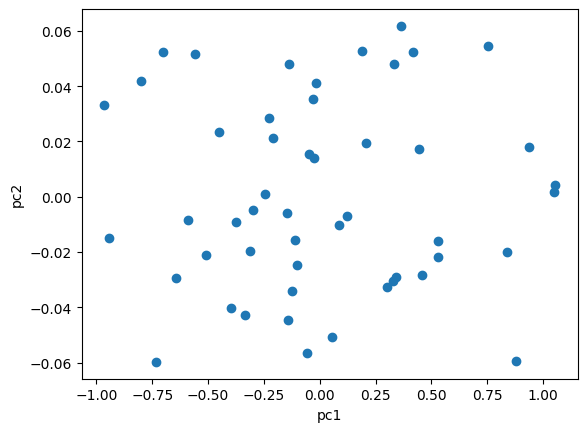

In [86]:
fig, ax = plt.subplots()
ax.scatter(data_pca[:, 0], data_pca[:, 1])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.show()

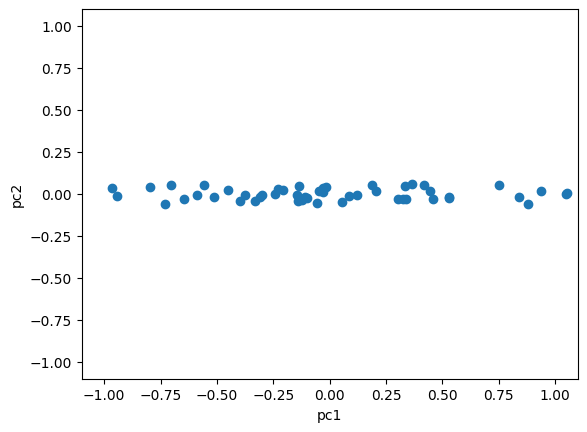

In [87]:
fig, ax = plt.subplots()
ax.scatter(data_pca[:, 0], data_pca[:, 1])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

# Kmeans cluster

In [88]:
iris = load_iris()
data = iris.data[:, [1, 3]]

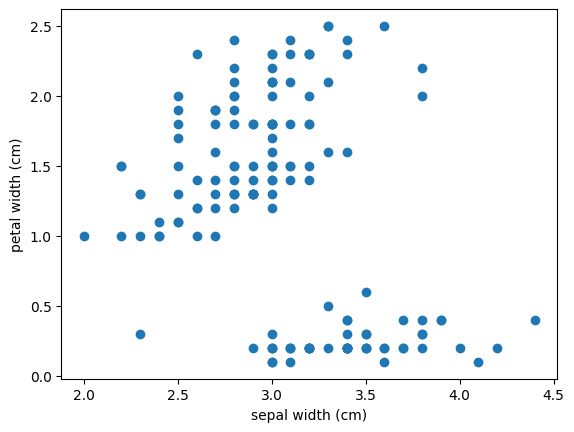

In [89]:
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal width (cm)')
plt.show()

In [90]:
from sklearn.cluster import KMeans

In [96]:
km = KMeans(n_clusters=3, init='random', n_init=100, random_state=123)

In [97]:
data_km = km.fit_predict(data)

In [98]:
data_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

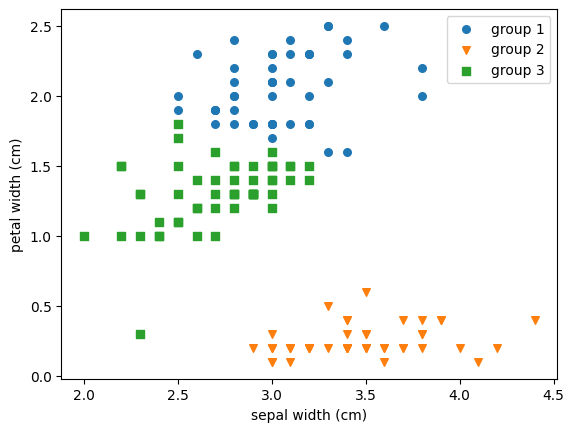

In [99]:
fig, ax = plt.subplots()
# group 1
ax.scatter(data[data_km == 0, 0], data[data_km == 0, 1], s=30, marker='o', label='group 1')
# group 2
ax.scatter(data[data_km == 1, 0], data[data_km == 1, 1], s=30, marker='v', label='group 2')
# group 3
ax.scatter(data[data_km == 2, 0], data[data_km == 2, 1], s=30, marker='s', label='group 3')

ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal width (cm)')
ax.legend(loc='best')
plt.show()

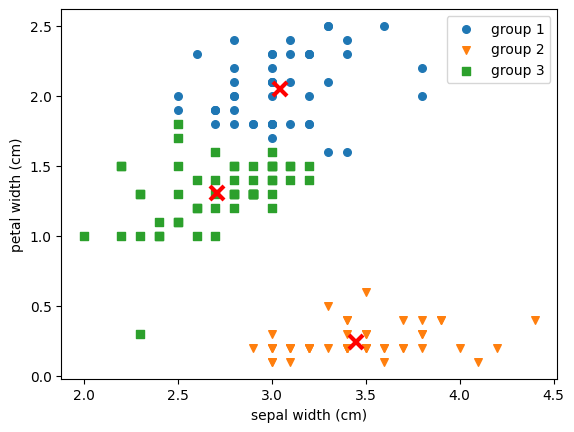

In [95]:
fig, ax = plt.subplots()
# group 1
ax.scatter(data[data_km == 0, 0], data[data_km == 0, 1], s=30, marker='o', label='group 1')
ax.plot(np.mean(data[data_km == 0, 0]), np.mean(data[data_km == 0, 1]), marker='x', markersize=10, color='red', markeredgewidth=3)
# group 2
ax.scatter(data[data_km == 1, 0], data[data_km == 1, 1], s=30, marker='v', label='group 2')
ax.plot(np.mean(data[data_km == 1, 0]), np.mean(data[data_km == 1, 1]), marker='x', markersize=10, color='red', markeredgewidth=3)
# group 3
ax.scatter(data[data_km == 2, 0], data[data_km == 2, 1], s=30, marker='s', label='group 3')
ax.plot(np.mean(data[data_km == 2, 0]), np.mean(data[data_km == 2, 1]), marker='x', markersize=10, color='red', markeredgewidth=3)

ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal width (cm)')
ax.legend(loc='best')
plt.show()

# AgglomerativeClustering

In [102]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, linkage='complete')

In [103]:
ac.fit_predict(data)

array([2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [104]:
!pip install scipy
from scipy.cluster.hierarchy import dendrogram


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
children = ac.children_ # 1
distance = np.arange(children.shape[0]) # 2
no_of_observations = np.arange(2, children.shape[0]+2) 

In [106]:
linkage_matrix = np.hstack((children, distance[:, np.newaxis], no_of_observations[:, np.newaxis])).astype(float)

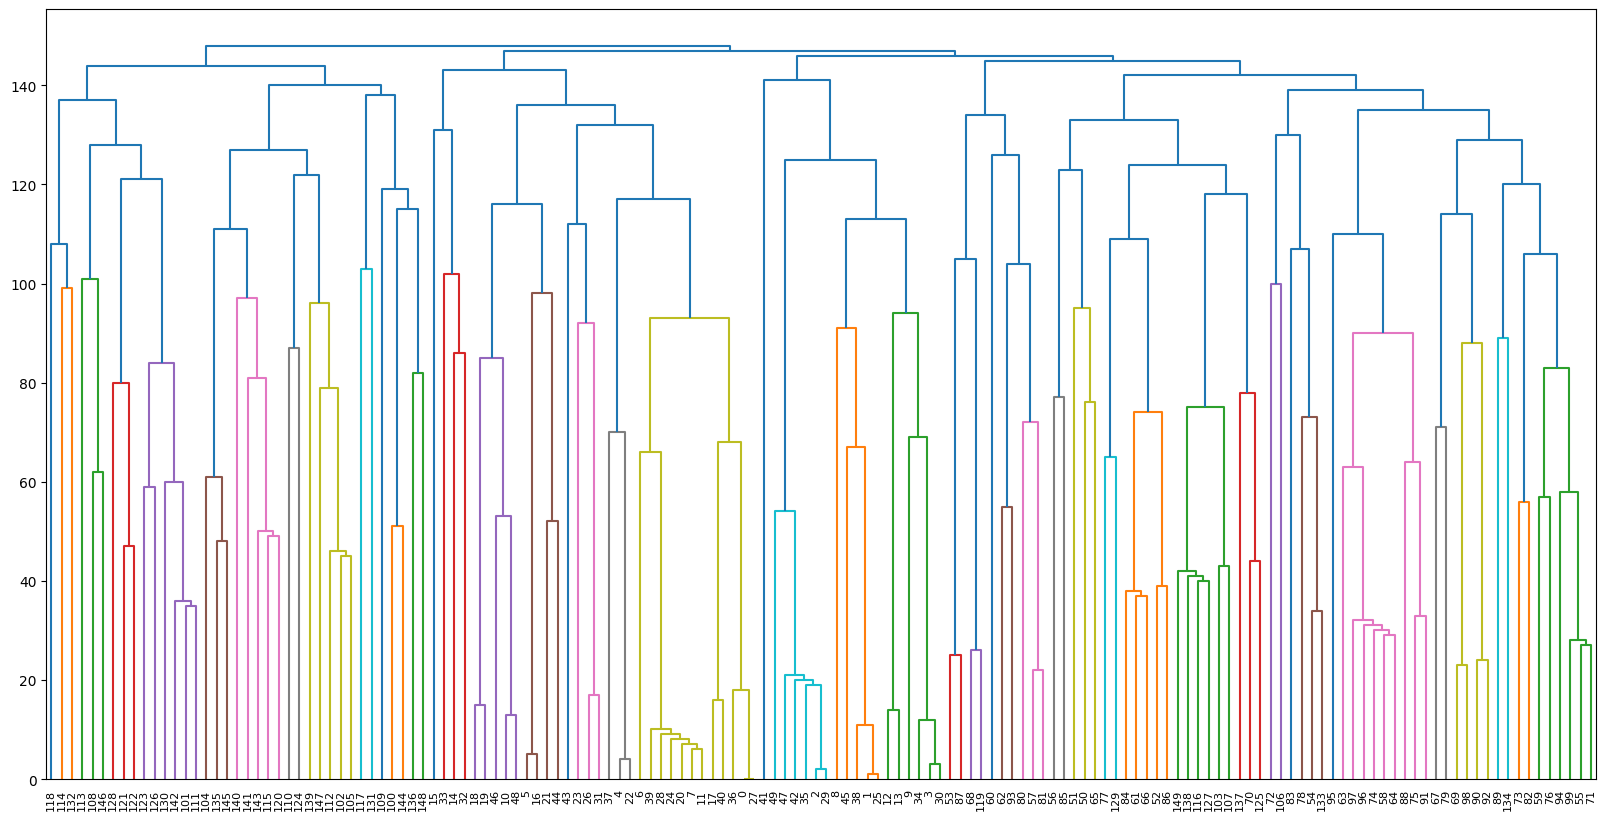

In [107]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=100)
dendrogram(linkage_matrix, leaf_font_size=8)
plt.show()

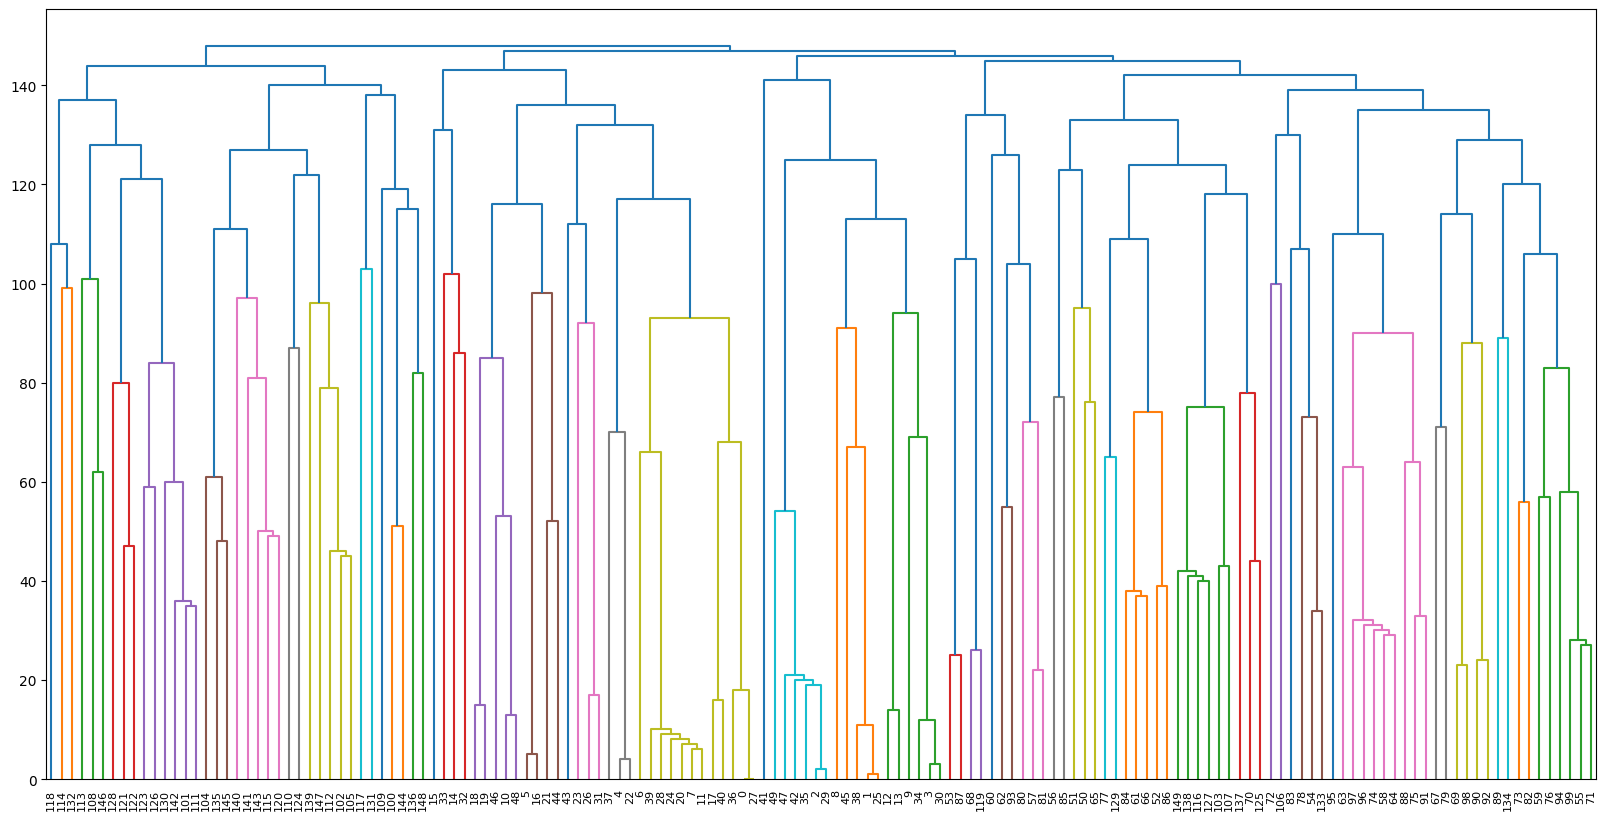

In [108]:
children = ac.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.hstack((children, distance[:, np.newaxis], no_of_observations[:, np.newaxis])).astype(float)
fig, ax = plt.subplots(figsize=(20, 10), dpi=100)
dendrogram(linkage_matrix, leaf_font_size=8)
plt.show()

# Hyperparameter optimization

## Grid Search

In [109]:
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [110]:
tree_model = DecisionTreeClassifier()

In [111]:
from sklearn.model_selection import GridSearchCV #grid search cross-validation

In [114]:
# training - model training 
# validation - hyperparameter optimization
# test - model evaluation 

tree_depth = {'max_depth': [2, 3, 4, 5], 'criterion':["gini", "entropy", "log_loss"]}
clf = GridSearchCV(tree_model, param_grid=tree_depth, cv=10)
clf.fit(data_train, target_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5]})

In [115]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [116]:
target_pred = clf.predict(data_test)
target_pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

In [117]:
accuracy_score(target_pred, target_test)

0.9666666666666667

# Evaluation

In [118]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, target = iris.data[:100, :], iris.target[:100]
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [119]:
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(data_train, target_train)
target_pred = model_dt.predict(data_test)

In [120]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
cross_val_score(model_dt, data, target, cv=10, scoring='accuracy')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# ROC curve

In [124]:
df = pd.DataFrame({"Predicted purchase probability": np.array([0.99, 0.97, 0.91, 0.88, 0.82, 0.81, 0.79, 0.74, 0.65, 0.6, 0.53, 0.50, 0.41, 0.39, 0.33, 0.3, 0.25, 0.21, 0.18, 0.17]),
                    "Achievements": np.array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]),
                    "true positive rate": np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 12, 12])/12,
                    "false positive rate": np.array([0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 8])/8})
df

,Predicted purchase probability,Achievements,true positive rate,false positive rate
0,0.99,1,0.083333,0.000
1,0.97,0,0.083333,0.125
2,0.91,1,0.166667,0.125
3,0.88,0,0.166667,0.250
4,0.82,1,0.250000,0.250
5,0.81,0,0.250000,0.375
6,0.79,0,0.250000,0.500
7,0.74,1,0.333333,0.500
8,0.65,1,0.416667,0.500
9,0.60,0,0.416667,0.625


In [125]:
tp_data = df.loc[:, "true positive rate"].values
fp_data = df.loc[:, "false positive rate"].values
fp_data = np.append(0, fp_data)
tp_data = np.append(0, tp_data)
print(tp_data)
print(fp_data)

[0.         0.08333333 0.08333333 0.16666667 0.16666667 0.25
 0.25       0.25       0.33333333 0.41666667 0.41666667 0.5
 0.58333333 0.66666667 0.66666667 0.75       0.75       0.83333333
 0.91666667 1.         1.        ]
[0.    0.    0.125 0.125 0.25  0.25  0.375 0.5   0.5   0.5   0.625 0.625
 0.625 0.625 0.75  0.75  0.875 0.875 0.875 0.875 1.   ]


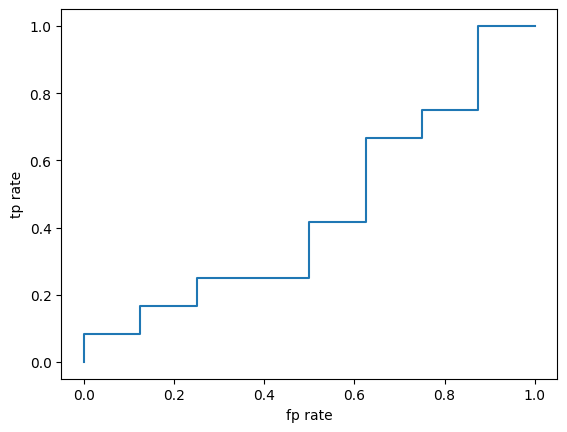

In [126]:
fig, ax = plt.subplots()
ax.step(fp_data, tp_data)
ax.set_xlabel('fp rate')
ax.set_ylabel('tp rate')
plt.show()

In [128]:
from sklearn.metrics import roc_curve

target_data = df.loc[:, "Achievements"].values
pred_rate = df.loc[:, "Predicted purchase probability"].values
fp_rate, tp_rate, threshold = roc_curve(target_data, pred_rate)
print('true positive rate： ', tp_rate)
print('false positive rate： ', fp_rate)

true positive rate：  [0.         0.08333333 0.08333333 0.16666667 0.16666667 0.25
 0.25       0.41666667 0.41666667 0.66666667 0.66666667 0.75
 0.75       1.         1.        ]
false positive rate：  [0.    0.    0.125 0.125 0.25  0.25  0.5   0.5   0.625 0.625 0.75  0.75
 0.875 0.875 1.   ]


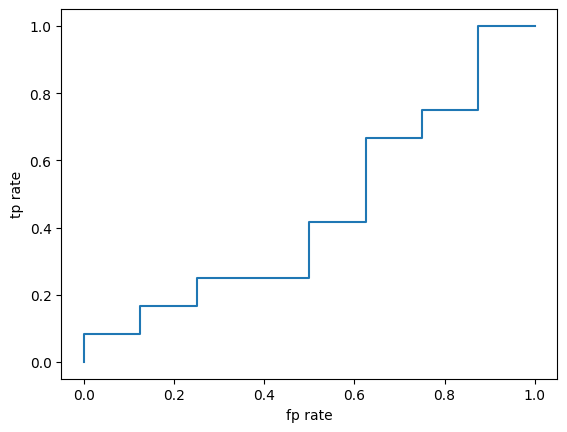

In [129]:
fig, ax = plt.subplots()
ax.step(fp_rate, tp_rate)
ax.set_xlabel('fp rate')
ax.set_ylabel('tp rate')
plt.show()

In [130]:
from sklearn.metrics import roc_auc_score
roc_auc_score(target_data, pred_rate)

0.4479166666666667